In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def load_results(model_name):

    results = pd.read_csv(f"../results{model_name}.csv")
    # results = results.drop(results[results['tuning'] != 'standard'].index)

    fig, ax = plt.subplots(figsize=(20, 5))

    # sns.barplot(data=results, x="sampler", y="ESS", hue=results[['integrator', 'preconditioning', 'inv_L_prop']].apply(
    # lambda row: f"{row.integrator}, {row.preconditioning}, {row.inv_L_prop}", axis=1), ax=ax)

    results = results.drop(results[results['inv_L_prop'] != 0.0].index)
    sns.barplot(data=results, x="sampler", y="ESS", hue=results[['integrator', 'preconditioning']].apply(
    lambda row: f"{row.integrator}, {row.preconditioning}", axis=1), ax=ax)

    plt.xlabel("Sampler")
    plt.ylabel("ESS")
    plt.title(model_name)
    plt.show()
    plt.show()
    display(results)


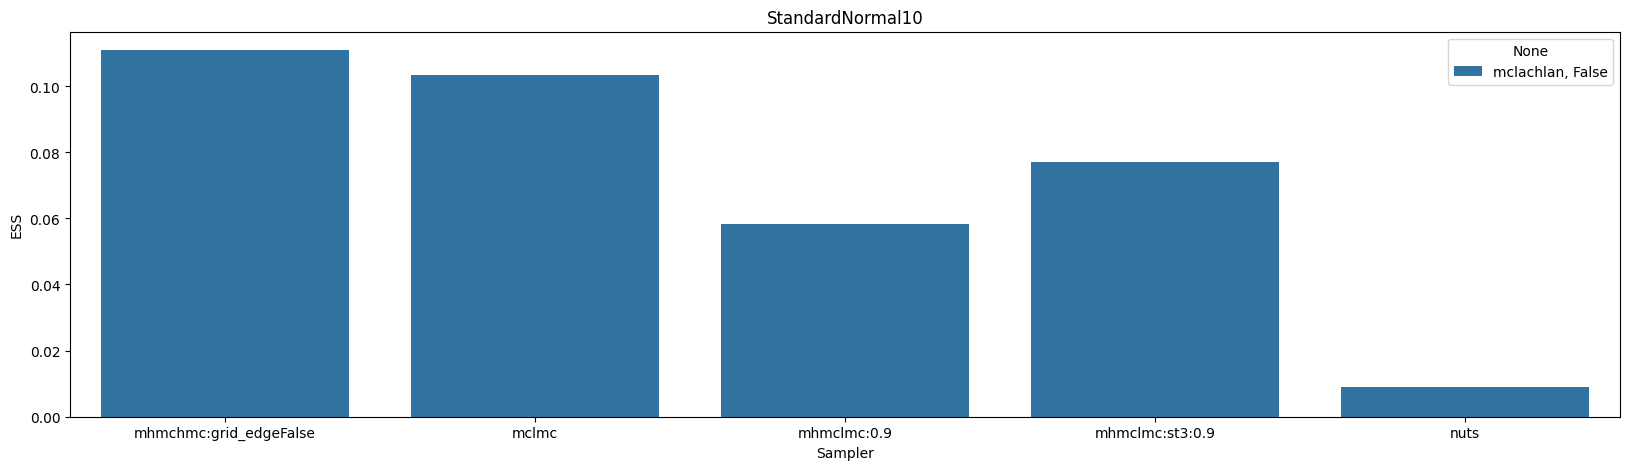

,model,dims,sampler,L,step_size,integrator,tuning,acc_rate,preconditioning,inv_L_prop,ess_avg,inv_ess_corr,num_steps,ESS
0,StandardNormal,10,mhmchmc:grid_edgeFalse,4.670475,4.614420,mclachlan,gridsearch,0.941468,False,0.0,0.429564,NaN,2000,0.111011
1,StandardNormal,10,mclmc,2.637351,3.585087,mclachlan,standard,1.000000,False,0.0,0.403226,NaN,2000,0.103520
2,StandardNormal,10,mhmclmc:0.9,3.145472,2.859519,mclachlan,standard,0.987079,False,0.0,0.237982,NaN,2000,0.058200
3,StandardNormal,10,mhmclmc:st3:0.9,4.040694,3.673357,mclachlan,standard,0.970466,False,0.0,0.317864,NaN,2000,0.077172
4,StandardNormal,10,nuts,0.000000,0.000000,mclachlan,standard,0.808576,False,0.0,0.031424,NaN,2000,0.008819


In [12]:
load_results("StandardNormal10")

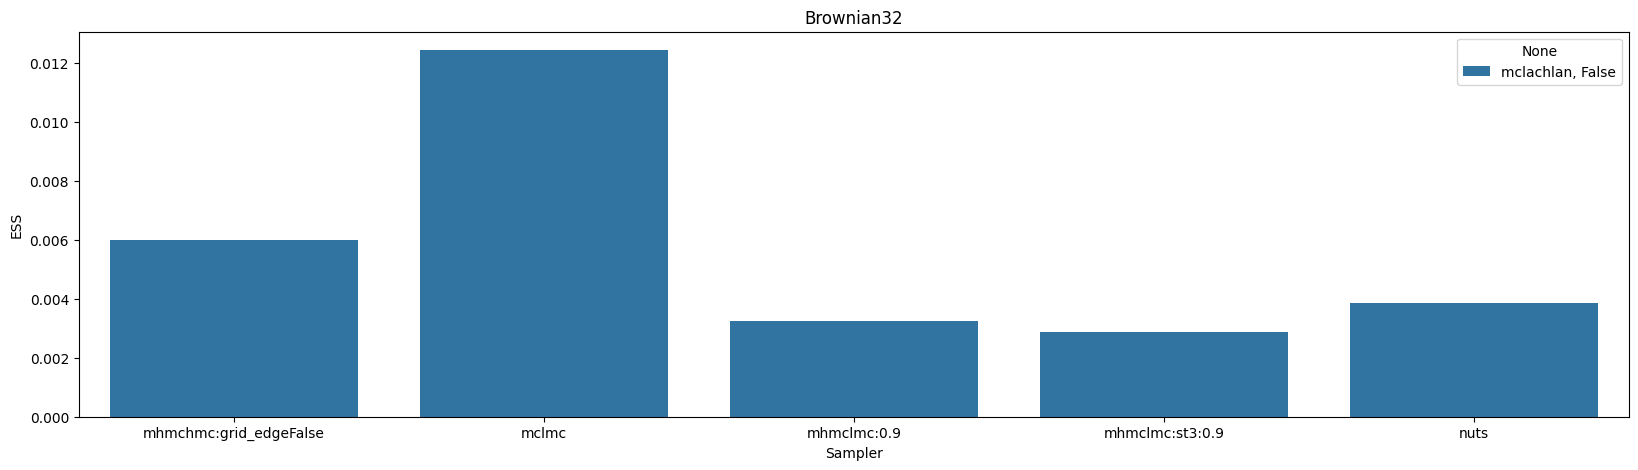

,model,dims,sampler,L,step_size,integrator,tuning,acc_rate,preconditioning,inv_L_prop,ess_avg,inv_ess_corr,num_steps,ESS
0,Brownian,32,mhmchmc:grid_edgeFalse,2.379265,0.382358,mclachlan,gridsearch,0.827955,False,0.0,0.038446,NaN,20000,0.005987
1,Brownian,32,mclmc,2.231286,0.311349,mclachlan,standard,1.000000,False,0.0,0.072464,NaN,20000,0.012447
2,Brownian,32,mhmclmc:0.9,0.824557,0.404582,mclachlan,standard,0.845007,False,0.0,0.020186,NaN,20000,0.003257
3,Brownian,32,mhmclmc:st3:0.9,5.796056,0.295732,mclachlan,standard,0.885229,False,0.0,0.018157,NaN,20000,0.002863
4,Brownian,32,nuts,0.000000,0.000000,mclachlan,standard,0.791696,False,0.0,0.017400,NaN,20000,0.003868


In [9]:
# load_results("IllConditionedGaussian")
load_results("Brownian32")
# load_results("Funnel")
# load_results("Banana")
# load_results("StochasticVolatility")
# load_results("GermanCredit")

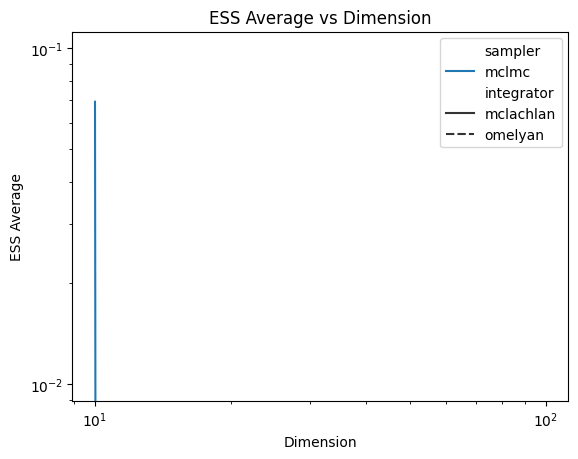

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('../omelyan.csv')

# filter df for just omelyan
# df = df[df['integrator'] == 'omelyan']
# df['sampler']

# Plot the ess_avg against dimension on a log scale
# plt.plot(df['dims'], df['ESS'])
# plt.xscale('log')

plot = sns.lineplot(data=df, x="dims", y="ESS", hue="sampler", style="integrator")
plot.set(xscale='log')
plot.set(yscale='log')
plt.xlabel('Dimension')
plt.ylabel('ESS Average')
plt.title('ESS Average vs Dimension')
plt.show()


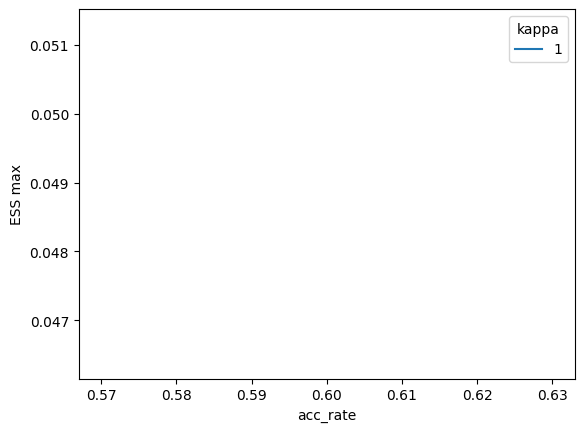

,model,dims,kappa,target_acc_rate,true_rate,sampler,integrator,L,step_size,ess
0,IllConditionedGaussian,10,1,0.6,0.948937,mclmc,mclachlan,6.352486,4.3556,0.048836


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('../grid_search_L.csv')
# df 
# filter df for just omelyan
# df = df[df['integrator'] == 'omelyan']
# df['sampler']

# Plot the ess_avg against dimension on a log scale
# plt.plot(df['dims'], df['ESS'])
# plt.xscale('log')


plot = sns.lineplot(data=df, x="target_acc_rate", y="ess", hue="kappa")
# plot.set(xscale='log')
# plot.set(yscale='log')
plt.xlabel('acc_rate')
plt.ylabel('ESS max')
# plt.title('ESS Average vs Dimension')
plt.show()

df

In [33]:
numbers = """
14.11613655090332
15.358882904052734
16.710872650146484
16.850135803222656
17.52535057067871
18.947330474853516
19.28826141357422
20.620084762573242
21.69899559020996
23.607864379882812
21.498741149902344
21.122337341308594
21.341915130615234
23.218955993652344
24.855052947998047
22.220537185668945
20.038455963134766
21.80052375793457
22.557619094848633
19.943708419799805
19.75666046142578
21.2584228515625
23.127153396606445
20.752384185791016
21.01228141784668
22.85906982421875
24.86794662475586
24.071975708007812
25.58966827392578
23.101253509521484
25.130924224853516
23.630146026611328
24.975557327270508
27.16940689086914
29.555688858032227
26.054332733154297
23.836389541625977
25.929759979248047
26.629234313964844
23.55750274658203
24.868656158447266
21.92388343811035
23.84885025024414
25.88926887512207
22.865951538085938
24.002145767211914
21.228124618530273
20.048458099365234
18.36475372314453
17.553468704223633
19.094228744506836
19.813526153564453
21.55231475830078
20.360870361328125
22.14745330810547
24.090572357177734
26.08916664123535
23.006061553955078
20.298620223999023
18.894689559936523
18.37380599975586
19.98550033569336
19.341289520263672
18.360919952392578
17.64089012145996
17.615541458129883
19.160320281982422
19.815000534057617
20.418350219726562
22.208425521850586
21.63471794128418
23.53114128112793
23.31353759765625
24.97447395324707
25.294464111328125
27.510940551757812
28.740331649780273
25.342931747436523
25.386455535888672
22.41018295288086
19.789297103881836
18.467960357666016
16.593578338623047
18.04737663269043
19.628360748291016
18.64887046813965
18.723363876342773
18.406997680664062
19.264097213745117
19.10772705078125
18.555702209472656
20.18053436279297
19.06923484802246
20.738813400268555
22.554365158081055
19.95330047607422
19.07280731201172
17.65631103515625
16.653139114379883
18.10650062561035
19.69120216369629
18.420867919921875
19.496875762939453
20.886301040649414
22.596004486083984
22.312416076660156
24.264286041259766
22.223918914794922
24.167827606201172
21.327587127685547
19.11756134033203
18.67295265197754
19.443370819091797
19.239049911499023
20.921463012695312
19.434619903564453
18.479543685913086
18.027469635009766
19.6036376953125
19.105161666870117
17.180028915405273
16.100234985351562
17.198232650756836
17.68377113342285
19.22938346862793
18.17022705078125
18.673450469970703
20.305227279663086
18.76926040649414
18.12972640991211
18.091094970703125
17.631479263305664
17.365442276000977
18.88247299194336
20.531841278076172
21.280227661132812
23.068889617919922
21.21800994873047
19.308879852294922
20.235532760620117
21.016860961914062
22.851795196533203
20.470426559448242
19.949581146240234
21.69110107421875
21.489192962646484
23.364803314208984
25.403892517089844
22.524734497070312
20.851646423339844
19.776426315307617
21.50214958190918
23.378250122070312
25.417814254760742
22.463354110717773
24.42292594909668
25.252405166625977
22.32089614868164
21.706829071044922
19.17085838317871
18.66377067565918
17.807170867919922
16.91915512084961
17.127668380737305
17.22633171081543
18.72847557067871
20.361417770385742
22.13653564453125
19.66700553894043
18.39208221435547
19.995351791381836
17.796857833862305
16.64124298095703
16.999408721923828
16.770383834838867
18.23196029663086
19.517072677612305
21.217666625976562
20.165424346923828
19.921306610107422
21.656795501708984
23.54326820373535
25.593841552734375
23.33378028869629
20.59276008605957
21.45855140686035
23.327238082885742
21.311443328857422
22.369548797607422
23.19135284423828
22.336627960205078
21.51213836669922
23.384849548339844
25.19171905517578
23.42349624633789
22.983413696289062
24.98366355895996
27.09282684326172
23.941593170166016
26.024818420410156
22.968835830688477
22.989513397216797
20.311298370361328
18.405475616455078
19.001733779907227
17.91229820251465
19.470592498779297
19.25385284423828
19.86272430419922
20.86700439453125
22.681743621826172
20.57817840576172
22.367612838745117
23.320560455322266
25.348060607910156
26.716163635253906
23.601696014404297
25.078588485717773
22.916221618652344
23.231868743896484
22.341140747070312
24.282777786254883
24.073734283447266
23.58074378967285
20.929445266723633
22.738876342773438
21.13507080078125
22.090831756591797
23.641597747802734
25.69525146484375
27.927043914794922
24.65867805480957
21.767019271850586
23.657512664794922
23.91681480407715
21.714448928833008
19.481307983398438
17.751848220825195
17.265270233154297
17.830575942993164
19.378782272338867
20.39577865600586
22.166358947753906
20.63836669921875
22.429794311523438
24.37649917602539
21.973350524902344
22.357067108154297
24.29714012145996
26.40532112121582
23.317501068115234
25.09202766418457
22.184162139892578
23.790203094482422
25.853849411010742
27.938039779663086
30.214462280273438
26.67543601989746
23.555557250976562
20.80741310119629
20.114036560058594
18.097936630249023
17.57956886291504
17.337596893310547
16.64151382446289
16.396686553955078
17.818395614624023
18.799047470092773
19.8486270904541
21.569124221801758
22.49246597290039
23.069599151611328
24.880596160888672
23.075794219970703
25.07526397705078
23.956621170043945
25.69486427307129
25.738502502441406
22.728599548339844
24.697444915771484
21.92662811279297
19.414710998535156
21.096393585205078
19.285181045532227
20.955459594726562
20.498411178588867
22.27349853515625
20.216537475585938
20.24102783203125
20.300739288330078
21.849925994873047
22.33529281616211
22.9805908203125
23.30846405029297
25.32581329345703
26.501686096191406
23.4038143157959
20.683685302734375
22.473602294921875
19.84747314453125
17.6295166015625
16.278371810913086
15.841477394104004
17.097381591796875
17.870418548583984
19.416427612304688
21.09599494934082
22.665531158447266
24.058303833007812
26.138763427734375
28.236743927001953
26.194868087768555
23.424882888793945
24.834190368652344
21.940731048583984
21.4613094329834
19.382604598999023
21.058216094970703
20.4552001953125
19.9285831451416
19.798542022705078
21.509706497192383
20.709270477294922
19.20045280456543
20.27826499938965
22.030471801757812
19.517427444458008
18.077302932739258
17.357006072998047
18.856616973876953
20.047584533691406
21.7792911529541
23.66037940979004
25.70370101928711
22.716644287109375
20.678394317626953
20.074798583984375
21.808273315429688
23.691226959228516
23.906005859375
24.3918399810791
21.80214500427246
23.456409454345703
21.495311737060547
23.350643157958984
25.069095611572266
22.147422790527344
19.566120147705078
18.354949951171875
17.999357223510742
19.55260467529297
18.563634872436523
17.466888427734375
16.782005310058594
18.117273330688477
19.680255889892578
21.37788963317871
21.39169692993164
20.899301528930664
22.701711654663086
24.659347534179688
26.197677612304688
26.893634796142578
23.761014938354492
21.049999237060547
18.72705078125
16.98917007446289
18.453914642333984
20.044769287109375
18.185686111450195
17.537321090698242
17.719499588012695
19.221494674682617
18.70364761352539
20.226600646972656
21.969484329223633
22.38463020324707
24.313121795654297
26.40752410888672
28.682098388671875
25.364238739013672
26.14804458618164
25.83232879638672
22.870258331298828
22.313325881958008
21.97760009765625
23.870101928710938
25.185707092285156
26.98453712463379
28.856781005859375
25.519287109375
22.973068237304688
24.950578689575195
25.83848762512207
24.996652603149414
22.089265823364258
23.990320205688477
24.081586837768555
26.15376091003418
28.40038299560547
29.032367706298828
25.66348648071289
27.871191024780273
24.770221710205078
25.005939483642578
27.15676498413086
25.340007781982422
27.519306182861328
24.417552947998047
21.70541763305664
22.248825073242188
24.16201400756836
22.81865692138672
24.780593872070312
26.910991668701172
23.825672149658203
23.39091682434082
25.40158462524414
22.516910552978516
24.452285766601562
23.596073150634766
22.2177734375
24.12713623046875
22.162248611450195
22.910085678100586
24.878572463989258
22.221946716308594
22.02096176147461
23.91278839111328
24.79435157775879
26.92404556274414
23.8128662109375
21.069229125976562
22.87885284423828
20.223079681396484
18.576311111450195
20.171688079833984
21.903894424438477
23.78463363647461
24.31797981262207
23.356910705566406
25.362001419067383
24.483470916748047
22.075414657592773
23.928483963012695
25.98215103149414
22.99444007873535
21.343599319458008
22.280866622924805
23.161161422729492
21.2766056060791
23.102210998535156
21.70568084716797
20.967567443847656
21.172706604003906
22.9890079498291
22.967670440673828
20.373985290527344
22.12152099609375
20.201528549194336
18.078582763671875
17.134485244750977
18.604007720947266
17.205947875976562
18.326520919799805
17.20769500732422
17.378381729125977
18.86840057373047
16.927963256835938
17.328195571899414
16.21088409423828
16.890981674194336
17.709997177124023
18.52679443359375
20.11459732055664
18.40934181213379
19.986906051635742
21.69947624206543
19.989112854003906
21.04431915283203
22.84712791442871
20.489723205566406
18.877588272094727
17.652206420898438
19.16427230834961
20.805675506591797
18.43177032470703
16.84048843383789
15.885517120361328
17.245969772338867
18.722774505615234
20.32586097717285
22.066017150878906
23.32326889038086
25.319643020629883
27.33146858215332
28.04520606994629
24.834575653076172
22.248708724975586
20.06591796875
20.374826431274414
22.118309020996094
21.62171745300293
23.471630096435547
25.47958755493164
24.690975189208984
22.23200035095215
21.883808135986328
20.053081512451172
18.648447036743164
20.003639221191406
18.459917068481445
17.997081756591797
18.182662963867188
19.16278839111328
20.142820358276367
21.865053176879883
20.226579666137695
18.449665069580078
18.93453598022461
18.319644927978516
19.885663986206055
21.585365295410156
21.33870506286621
19.11910057067871
17.469724655151367
18.059885025024414
16.965295791625977
16.2158203125
17.601503372192383
19.105430603027344
18.02288055419922
18.50812530517578
17.725242614746094
19.239402770996094
19.344411849975586
19.56142807006836
20.836448669433594
22.6129093170166
24.543758392333984
24.241273880004883
26.31084442138672
28.556854248046875
29.614248275756836
26.19488525390625
23.173606872558594
20.540786743164062
18.306625366210938
16.492441177368164
15.551689147949219
16.117494583129883
16.466400146484375
16.57244873046875
17.986732482910156
16.81411361694336
18.248855590820312
18.853797912597656
18.675241470336914
20.26841926574707
21.997316360473633
22.432430267333984
24.185871124267578
23.20849609375
25.18757438659668
26.94327735900879
29.2403621673584
25.867839813232422
22.92578887939453
20.47297477722168
19.000244140625
18.02412223815918
17.475101470947266
18.9010066986084
20.512113571166992
22.260360717773438
24.15740203857422
25.905662536621094
23.493806838989258
21.416900634765625
22.564159393310547
24.148601531982422
21.51649284362793
20.20346450805664
20.266935348510742
18.732168197631836
18.49716567993164
18.860475540161133
18.256914138793945
17.888877868652344
17.720354080200195
19.229494094848633
20.866973876953125
21.784379959106445
23.375965118408203
21.316997528076172
23.131731033325195
20.753246307373047
22.485092163085938
24.398883819580078
24.263580322265625
21.6367244720459
21.881742477416992
21.10330581665039
21.570161819458008
21.52779769897461
23.35946273803711
20.881406784057617
20.914226531982422
21.993309020996094
22.199874877929688
22.25636863708496
22.197589874267578
23.77778434753418
25.799884796142578
23.773799896240234
21.621450424194336
21.281694412231445
23.056171417236328
24.089292526245117
22.261272430419922
24.153766632080078
21.381391525268555
23.198928833007812
24.747955322265625
22.739364624023438
22.45863151550293
19.894792556762695
18.424644470214844
19.990495681762695
20.20869255065918
20.210966110229492
21.92824363708496
19.47408676147461
18.789892196655273
20.386245727539062
20.572202682495117
22.319683074951172
24.215394973754883
25.21661949157715
25.407604217529297
22.95465087890625
23.78528594970703
25.804855346679688
22.923450469970703
20.35196876525879
22.079914093017578
23.354663848876953
21.83934783935547
23.537532806396484
23.027456283569336
24.981870651245117
26.100658416748047
23.104591369628906
22.099990844726562
23.97533416748047
22.729175567626953
23.072608947753906
21.581974029541016
23.412994384765625
25.39914321899414
23.25482749938965
23.30855369567871
23.402910232543945
20.782133102416992
20.011266708374023
19.01845932006836
20.63142967224121
19.568588256835938
17.51603126525879
16.113384246826172
15.245199203491211
14.713690757751465
15.961377143859863
16.66959571838379
17.411418914794922
16.993085861206055
16.69209861755371
16.508390426635742
17.907703399658203
18.625083923339844
19.312904357910156
20.949508666992188
21.43246078491211
23.248363494873047
24.48922348022461
21.683284759521484
23.520126342773438
24.95098876953125
24.87359046936035
22.565444946289062
20.5289249420166
22.267574310302734
19.861101150512695
21.275205612182617
22.070789337158203
20.996257781982422
20.875761032104492
22.64320182800293
20.93354606628418
20.867082595825195
18.498886108398438
17.167949676513672
18.621261596679688
17.089035034179688
16.029190063476562
15.51147747039795
16.824371337890625
18.24823760986328
17.724624633789062
17.93017578125
19.447315216064453
20.03226089477539
21.726961135864258
21.178234100341797
22.96963119506836
20.52438735961914
19.96890640258789
21.432689666748047
23.24520492553711
22.859054565429688
21.02572250366211
21.360755920410156
23.166799545288086
21.591798782348633
21.932880401611328
23.786970138549805
25.797578811645508
22.912227630615234
20.397323608398438
20.296844482421875
21.459365844726562
19.62818717956543
21.286951065063477
23.085704803466797
22.69158172607422
20.637874603271484
19.296531677246094
19.05654525756836
18.78150749206543
20.36817169189453
21.591236114501953
21.390043258666992
21.570892333984375
23.39264678955078
25.07400894165039
27.173553466796875
24.067466735839844
21.43044090270996
21.8767032623291
20.450464248657227
21.11202621459961
19.716888427734375
21.121768951416016
20.302980422973633
20.12015151977539
21.073204040527344
22.85171890258789
20.669090270996094
21.176921844482422
22.963897705078125
23.12369155883789
25.07461929321289
25.877901077270508
28.060810089111328
24.85532569885254
22.016714096069336
23.87381362915039
21.34365463256836
19.456787109375
19.254276275634766
18.631359100341797
20.202661514282227
19.194782257080078
20.288740158081055
21.99945068359375
23.829105377197266
22.426767349243164
24.31732940673828
25.945301055908203
23.106910705566406
24.23992156982422
22.24484634399414
24.119579315185547
25.299211502075195
22.412147521972656
20.260013580322266
18.204483032226562
18.101255416870117
18.10271453857422
17.68625831604004
17.149646759033203
18.59452247619629
17.431190490722656
18.456436157226562
17.243709564208984
16.393556594848633
17.7744083404541
19.23769760131836
20.857776641845703
20.651287078857422
22.39014434814453
24.275205612182617
25.35332489013672
27.487462997436523
24.353702545166016
21.59113883972168
20.995025634765625
19.084457397460938
18.303508758544922
19.84406089782715
19.832294464111328
18.113990783691406
19.63836669921875
18.17571258544922
17.23379135131836
16.649494171142578
18.05040168762207
19.569026947021484
19.312549591064453
20.937114715576172
18.711318969726562
20.285179138183594
17.997478485107422
16.694557189941406
15.682506561279297
15.08607006072998
16.354841232299805
17.18027114868164
18.624889373779297
19.455612182617188
20.98974609375
21.597476959228516
23.242511749267578
22.29676055908203
19.919069290161133
21.593204498291016
19.474245071411133
17.98533821105957
17.29743194580078
18.656585693359375
20.224266052246094
21.923492431640625
23.765287399291992
21.06659698486328
22.83626365661621
21.064769744873047
22.201675415039062
19.839628219604492
20.004240036010742
21.684282302856445
23.235645294189453
21.039688110351562
22.80634880065918
21.94451904296875
20.15781021118164
18.030118942260742
16.769636154174805
18.177593231201172
19.353628158569336
20.978208541870117
18.849658966064453
19.55582618713379
18.487899780273438
20.039531707763672
17.80779457092285
19.30221939086914
17.30512046813965
16.93752670288086
15.936687469482422
17.08592414855957
18.326032638549805
19.863435745239258
19.870943069458008
20.39208221435547
20.65859603881836
21.65875816345215
23.475067138671875
23.228843688964844
25.176532745361328
22.316448211669922
24.187484741210938
24.600414276123047
26.6625919342041
26.75692367553711
24.36553382873535
26.407712936401367
23.40907096862793
24.132204055786133
21.406742095947266
19.87594223022461
18.522714614868164
18.662921905517578
20.226835250854492
19.20919418334961
20.019397735595703
19.74267578125
19.77772331237793
21.434555053710938
20.192163467407227
19.85133934020996
19.809907913208008
21.469087600708008
20.392709732055664
19.160850524902344
19.812911987304688
21.471996307373047
19.287673950195312
20.90263557434082
19.352880477905273
18.405981063842773
19.946922302246094
21.565807342529297
22.675373077392578
24.573192596435547
21.993953704833984
19.70580291748047
21.354965209960938
23.141963958740234
20.74448585510254
19.287723541259766
19.41934585571289
19.904010772705078
21.122356414794922
22.889339447021484
21.047338485717773
20.67365264892578
22.40285873413086
19.89885711669922
19.798538208007812
21.454326629638672
20.087251663208008
18.53598403930664
20.011924743652344
21.68520164489746
21.1497802734375
18.942134857177734
16.903684616088867
15.910237312316895
14.953431129455566
16.203588485717773
16.15831756591797
14.970585823059082
14.1758394241333
13.592294692993164
13.37946891784668
13.931788444519043
14.119617462158203
14.65713119506836
14.091835021972656
13.879743576049805
14.086457252502441
14.587358474731445
15.80610466003418
17.126537322998047
18.20992660522461
18.568145751953125
20.118913650512695
20.4764347076416
21.839473724365234
20.043058395385742
20.847904205322266
22.484691619873047
22.00649642944336
23.843551635742188
21.410213470458984
20.579954147338867
21.523645401000977
19.430936813354492
18.562976837158203
19.704736709594727
21.349163055419922
21.38651466369629
20.22567367553711
21.913280487060547
20.319591522216797
18.69363021850586
17.87762451171875
19.36911964416504
20.44142723083496
21.51586151123047
21.14154815673828
22.904788970947266
22.947980880737305
24.740615844726562
22.188308715820312
23.42097282409668
21.014625549316406
19.55669403076172
19.0317440032959
20.618467330932617
22.337305068969727
23.693227767944336
21.587535858154297
23.386817932128906
25.33586883544922
23.015748977661133
24.933696746826172
22.36870574951172
22.685279846191406
21.709991455078125
23.518814086914062
21.599994659423828
19.504554748535156
20.159208297729492
21.83856201171875
23.657621383666992
25.628000259399414
22.751197814941406
"""

In [42]:
numbers_floats = [float(n) for n in numbers.split("\n")[1:-1]]


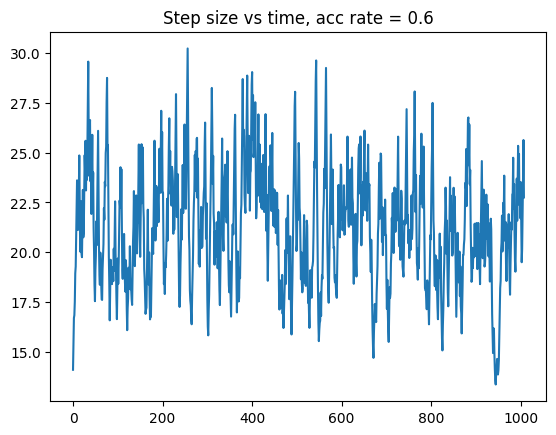

In [47]:
import matplotlib.pyplot as plt

plt.plot(numbers_floats)
# plt.xlabel('Index')
# plt.ylabel('Value')
plt.title('Step size vs time, acc rate = 0.6')
plt.show()


In [60]:
numbers2 = """ 
45.45454406738281
45.45454406738281
45.45454406738281
5.959798812866211
7.101480007171631
8.981182098388672
11.780220031738281
15.656052589416504
18.472190856933594
6.6125078201293945
9.08182144165039
12.533609390258789
17.30716323852539
23.868406295776367
32.83279800415039
45.00779342651367
45.45454406738281
45.45454406738281
5.568462371826172
7.682394981384277
10.547846794128418
14.412344932556152
19.594030380249023
25.259618759155273
34.010589599609375
45.45454406738281
11.661539077758789
15.688863754272461
21.002925872802734
24.537818908691406
7.924201011657715
10.575603485107422
13.911958694458008
17.974990844726562
23.701950073242188
30.10321044921875
39.36229705810547
34.99262619018555
40.616127014160156
45.45454406738281
45.45454406738281
8.12955093383789
10.589672088623047
13.75851058959961
16.901472091674805
21.80368423461914
28.02709197998047
35.09000015258789
41.9473762512207
45.45454406738281
17.692401885986328
22.579944610595703
28.725431442260742
29.467548370361328
37.30734634399414
16.028865814208984
20.308780670166016
25.313377380371094
31.88908576965332
40.060760498046875
5.697941780090332
7.21063232421875
9.098745346069336
11.441938400268555
14.36131477355957
17.95296287536621
22.418188095092773
27.92463493347168
24.10487937927246
29.940723419189453
37.10246658325195
45.45454406738281
20.93551254272461
25.902332305908203
31.976655960083008
35.93764877319336
31.844730377197266
39.13272476196289
16.12101173400879
19.841520309448242
24.370803833007812
28.58100700378418
34.97386169433594
42.714473724365234
7.475533962249756
9.177905082702637
11.236417770385742
13.742761611938477
16.55985450744629
20.18070411682129
17.783161163330078
21.573444366455078
26.189977645874023
20.303049087524414
23.405315399169922
21.496444702148438
15.39678955078125
18.025075912475586
18.672191619873047
22.549930572509766
27.190500259399414
27.708637237548828
32.88469696044922
39.50146484375
45.45454406738281
13.101531028747559
15.673128128051758
18.82577896118164
22.580326080322266
27.045686721801758
32.349422454833984
34.810760498046875
41.54142761230469
16.569664001464844
19.800973892211914
23.631290435791016
28.166004180908203
33.52812576293945
39.86099624633789
45.45454406738281
10.874137878417969
12.95484733581543
15.414599418640137
18.11580467224121
21.504241943359375
23.817768096923828
23.88471031188965
28.2755069732666
31.83344268798828
37.60659408569336
41.438926696777344
37.25605010986328
43.91722869873047
13.921385765075684
16.444528579711914
19.162857055664062
22.062450408935547
22.9318904876709
25.060514450073242
29.469192504882812
33.2059211730957
38.97416687011719
45.45454406738281
23.950180053710938
22.497264862060547
17.520469665527344
20.55280876159668
19.284313201904297
22.59364891052246
26.44605255126953
30.926633834838867
34.29515838623047
39.454654693603516
45.45454406738281
45.45454406738281
45.45454406738281
17.495040893554688
20.41815948486328
20.427623748779297
23.670101165771484
24.497140884399414
25.072406768798828
23.56276512145996
27.406267166137695
31.850494384765625
36.985347747802734
42.913551330566406
11.792614936828613
13.225473403930664
15.36837387084961
17.84427833557129
20.70277976989746
22.97280502319336
26.614673614501953
30.810447692871094
26.632091522216797
30.807214736938477
15.054512977600098
17.426477432250977
20.15724754333496
23.29888153076172
26.91068458557129
31.06016731262207
35.745906829833984
11.586551666259766
13.386128425598145
15.454286575317383
17.52169418334961
20.201515197753906
23.275257110595703
25.74862289428711
29.62920570373535
27.700328826904297
31.55255889892578
36.25450134277344
16.77423858642578
19.263404846191406
20.461292266845703
23.503196716308594
26.980188369750977
30.95205307006836
35.48652648925781
17.075416564941406
19.381629943847656
22.04302215576172
23.660572052001953
26.267995834350586
30.07177734375
27.955577850341797
28.176891326904297
32.10886001586914
36.6988639831543
41.92082214355469
21.84603500366211
23.080326080322266
26.36767578125
27.397245407104492
31.270357131958008
29.82618522644043
29.941913604736328
34.13982009887695
32.180938720703125
36.66718673706055
38.56834030151367
43.905094146728516
44.882781982421875
17.51387596130371
19.394193649291992
22.084863662719727
24.703033447265625
28.101818084716797
28.704681396484375
32.627418518066406
29.310823440551758
33.298004150390625
37.002777099609375
41.996097564697266
20.379819869995117
23.145076751708984
24.3380126953125
27.617206573486328
28.43657112121582
20.870800018310547
23.467281341552734
26.60503578186035
30.147987365722656
34.14663314819336
38.65754699707031
13.309106826782227
15.086516380310059
17.09328269958496
19.30344009399414
21.028263092041016
23.794269561767578
25.684831619262695
28.145469665527344
31.809158325195312
30.948238372802734
21.09206199645996
20.439424514770508
23.092634201049805
20.085657119750977
19.234546661376953
21.719356536865234
24.514610290527344
27.65778350830078
29.020282745361328
32.50715255737305
34.77961730957031
39.182037353515625
44.123531341552734
19.941240310668945
22.472782135009766
25.31531524658203
18.597511291503906
20.836181640625
21.95084571838379
24.577146530151367
27.65353775024414
20.085220336914062
15.106171607971191
17.000572204589844
19.084096908569336
18.037599563598633
20.281625747680664
18.69459342956543
17.247100830078125
19.382858276367188
20.04854393005371
22.517072677612305
25.280019760131836
18.166393280029297
19.127933502197266
21.468463897705078
24.08647346496582
27.013813018798828
29.80137062072754
33.39982604980469
22.336650848388672
25.035951614379883
19.559595108032227
21.91989517211914
24.314008712768555
27.22911834716797
29.345470428466797
32.84273147583008
36.74403762817383
18.231260299682617
20.408069610595703
18.65545654296875
20.874919891357422
22.826204299926758
22.720233917236328
25.402679443359375
28.39228630065918
28.25858497619629
31.56869888305664
29.371047973632812
28.885326385498047
32.25178527832031
31.5546875
31.5621280670166
35.2187385559082
39.286380767822266
17.895219802856445
19.975177764892578
22.289749145507812
21.95047378540039
23.23036766052246
25.904111862182617
28.87655258178711
26.2073974609375
22.389995574951172
24.9526424407959
27.800033569335938
30.175729751586914
33.599857330322266
37.40120315551758
41.62013244628906
16.143604278564453
17.98013687133789
19.861618041992188
19.75794219970703
21.98955535888672
24.46599006652832
27.213302612304688
29.22177505493164
30.98335838317871
34.43632125854492
38.26310729980469
41.88093948364258
38.76018142700195
36.144657135009766
40.1357307434082
42.51529312133789
45.45454406738281
18.697620391845703
20.767065048217773
21.46410369873047
22.993913650512695
25.5230712890625
28.322614669799805
26.301097869873047
29.176803588867188
27.143587112426758
30.101947784423828
33.373748779296875
36.99126434326172
28.01675033569336
30.293907165527344
33.568294525146484
37.18679428100586
30.37944221496582
33.64960861206055
37.26206970214844
41.25166702270508
45.45454406738281
20.4487247467041
17.51502799987793
19.27528953552246
18.573436737060547
20.564023971557617
19.173545837402344
20.559734344482422
16.294824600219727
16.256649017333984
15.743900299072266
17.42142677307129
19.272863388061523
21.058101654052734
22.33486557006836
24.57924461364746
23.93994903564453
26.457473754882812
22.24911117553711
21.291378021240234
21.37200355529785
18.705310821533203
20.665876388549805
21.56328773498535
22.53908920288086
24.886985778808594
18.97813606262207
19.940746307373047
19.873382568359375
21.695762634277344
22.827739715576172
21.281171798706055
23.480220794677734
14.702437400817871
16.224878311157227
17.896286010742188
19.60597038269043
21.6214599609375
23.444231033325195
25.843090057373047
28.481006622314453
31.381168365478516
34.5689582824707
38.072147369384766
20.531097412109375
22.62001609802246
23.86874771118164
23.534828186035156
25.916763305664062
28.533557891845703
28.76415252685547
31.58586311340332
34.75605010986328
38.23625183105469
40.79651641845703
44.864017486572266
45.45454406738281
37.10935974121094
24.835464477539062
20.872318267822266
16.407461166381836
17.817596435546875
19.597333908081055
21.55034637451172
23.34853744506836
25.66514015197754
27.411827087402344
29.862680435180664
20.046350479125977
22.029808044433594
23.290910720825195
25.586044311523438
27.539987564086914
30.24230194091797
29.95930290222168
27.433305740356445
28.39975357055664
31.172910690307617
31.980520248413086
35.09197998046875
36.88817596435547
39.816802978515625
41.67209243774414
45.45454406738281
37.86927032470703
41.52202224731445
45.45454406738281
20.970956802368164
21.94772720336914
24.06900405883789
26.39026641845703
25.320850372314453
27.7560977935791
30.41982078552246
24.739913940429688
26.922138214111328
29.309383392333984
32.108299255371094
35.167972564697266
28.821226119995117
27.907955169677734
29.661739349365234
32.478843688964844
35.5569953918457
38.91981506347656
28.788166046142578
31.511699676513672
34.3746337890625
25.731769561767578
28.161619186401367
30.815399169921875
33.71324157714844
35.420162200927734
25.879560470581055
28.310503005981445
18.310104370117188
20.033220291137695
21.914623260498047
23.968503952026367
21.31998062133789
19.401607513427734
20.885101318359375
22.835533142089844
14.508367538452148
15.86606502532959
17.27324104309082
18.883228302001953
20.212841033935547
22.089693069458008
24.13671112060547
26.36895179748535
28.4967098236084
30.83527183532715
33.00911331176758
36.03907775878906
22.179845809936523
23.86902618408203
25.703266143798828
27.958450317382812
30.516855239868164
33.30390930175781
30.40545654296875
18.93906021118164
20.672775268554688
22.561519622802734
22.972110748291016
25.06439208984375
27.342823028564453
29.82356834411621
29.721826553344727
32.41073226928711
35.33727264404297
35.685447692871094
38.898101806640625
28.60211944580078
31.178401947021484
15.676158905029297
17.0947322845459
18.560617446899414
20.233924865722656
22.054645538330078
22.76699447631836
24.591537475585938
26.793411254882812
29.187942504882812
31.79160499572754
32.23136901855469
30.341064453125
33.03885269165039
35.077335357666016
38.18556213378906
39.79676818847656
42.53578186035156
42.22358703613281
42.21734619140625
20.420486450195312
22.23044204711914
23.261249542236328
23.763797760009766
25.86086654663086
28.138839721679688
30.58458137512207
27.073686599731445
24.18451499938965
24.590293884277344
26.347013473510742
28.65470314025879
29.974720001220703
28.564815521240234
30.601137161254883
33.267539978027344
31.284391403198242
32.8907356262207
35.746768951416016
23.860292434692383
21.790836334228516
23.648897171020508
25.702255249023438
25.05646324157715
27.22686004638672
28.47905731201172
30.938255310058594
33.414344787597656
36.289794921875
39.40724563598633
42.78661346435547
21.135515213012695
22.403696060180664
24.331266403198242
21.81683349609375
23.691160202026367
25.722999572753906
27.073938369750977
29.38865089416504
31.896955490112305
34.614688873291016
31.05341339111328
33.695465087890625
36.55742645263672
26.227663040161133
28.457304000854492
30.872398376464844
30.19601058959961
29.463809967041016
31.741422653198242
34.423065185546875
37.32637405395508
34.125797271728516
36.99945068359375
37.477237701416016
32.231056213378906
32.92463684082031
35.68886947631836
38.680206298828125
24.125572204589844
24.687973022460938
26.759876251220703
24.819162368774414
26.898502349853516
27.45405387878418
29.74797248840332
32.229488372802734
33.25535202026367
36.02174758911133
27.627696990966797
29.92650604248047
24.995317459106445
27.073789596557617
25.663372039794922
20.758655548095703
22.48383331298828
24.349365234375
19.86322784423828
21.510692596435547
22.70307159423828
24.58050537109375
26.609933853149414
28.80340003967285
29.213695526123047
31.61566925048828
33.123592376708984
28.07238006591797
30.375900268554688
19.90552520751953
21.541900634765625
22.209758758544922
22.610013961791992
23.649303436279297
24.556758880615234
25.654476165771484
27.748151779174805
24.37078094482422
26.357568740844727
27.918529510498047
30.18791389465332
32.6379508972168
19.328229904174805
20.90135955810547
22.498558044433594
23.323312759399414
22.996028900146484
24.85866928100586
26.869070053100586
28.874956130981445
27.53063201904297
29.749746322631836
32.1440544128418
31.69350242614746
34.23874282836914
36.98420715332031
29.020872116088867
31.348154067993164
21.45911979675293
23.18244743347168
23.324234008789062
25.19297981262207
27.208393096923828
29.381755828857422
31.725200653076172
22.029924392700195
22.455028533935547
24.246631622314453
20.016357421875
21.612754821777344
23.333908081054688
22.89012908935547
22.900588989257812
23.962848663330078
25.673248291015625
27.706735610961914
28.606422424316406
30.86652374267578
33.30158615112305
30.800642013549805
24.856245040893555
26.816892623901367
28.929096221923828
17.961008071899414
19.379037857055664
20.700458526611328
22.330158233642578
23.519481658935547
24.342464447021484
26.25172996520996
28.307756423950195
30.5216064453125
26.993881225585938
27.561098098754883
29.712411880493164
30.203182220458984
32.5384635925293
35.068790435791016
33.35129165649414
35.940494537353516
35.733150482177734
37.25477981567383
39.88703536987305
37.87590026855469
40.80233383178711
36.43976593017578
39.25227355957031
42.27758026123047
26.41992950439453
28.460933685302734
27.99329376220703
28.521703720092773
30.718820571899414
32.41475296020508
34.72557067871094
37.3900146484375
40.25489044189453
21.271984100341797
22.426467895507812
18.65534019470215
20.090049743652344
21.006071090698242
21.295738220214844
15.539628028869629
16.733409881591797
18.017118453979492
18.849681854248047
20.292131423950195
21.60944175720215
23.258708953857422
24.831727981567383
26.721866607666016
28.75309944152832
30.935741424560547
33.28087615966797
34.56143569946289
29.876510620117188
31.55975914001465
31.977859497070312
34.16496276855469
36.57606506347656
39.3313102722168
24.389171600341797
25.54633903503418
26.4676570892334
28.461986541748047
27.58700180053711
28.177032470703125
30.25708770751953
32.52803039550781
32.75779724121094
35.21135711669922
37.84516525268555
27.095409393310547
21.840227127075195
21.211576461791992
22.445104598999023
24.12531852722168
22.4344482421875
24.11163330078125
25.911827087402344
27.252967834472656
29.282745361328125
29.244308471679688
31.418128967285156
33.7504768371582
34.13163757324219
35.119117736816406
37.362693786621094
40.1247444152832
43.087120056152344
45.45454406738281
27.23366355895996
28.707788467407227
30.828170776367188
33.10221481323242
35.54085922241211
37.90716552734375
39.69670486450195
42.610713958740234
45.45454406738281
45.45454406738281
45.45454406738281
36.448604583740234
39.11766052246094
41.97850036621094
45.0446662902832
32.960411071777344
34.70878982543945
35.571224212646484
38.166629791259766
36.28110885620117
38.82441329956055
41.47438049316406
37.163394927978516
39.86534118652344
24.61004638671875
24.99749183654785
26.817895889282227
27.416561126708984
29.40896987915039
31.54351043701172
33.83010482788086
30.833955764770508
26.049747467041016
19.657691955566406
20.516613006591797
22.00487518310547
23.599105834960938
25.306716918945312
27.13562774658203
26.140003204345703
28.026243209838867
29.06153678894043
29.492464065551758
31.614402770996094
33.886226654052734
26.41297721862793
28.005502700805664
30.016414642333984
27.04959487915039
28.990070343017578
29.843250274658203
31.97967529296875
34.266258239746094
30.27581214904785
28.948711395263672
30.55148696899414
32.731502532958984
33.84492492675781
30.25142478942871
30.36170196533203
32.52304458618164
34.83544921875
37.30929183959961
22.156063079833984
21.944137573242188
23.50595474243164
25.176918029785156
24.575489044189453
24.608562469482422
26.354061126708984
28.22114372253418
23.72840118408203
25.408973693847656
24.609525680541992
26.349878311157227
21.8475341796875
18.414899826049805
19.718097686767578
20.899391174316406
17.706789016723633
18.958066940307617
20.296180725097656
19.534404754638672
20.515289306640625
21.95977020263672
23.504150390625
19.01800537109375
20.35556983947754
21.53738784790039
21.341014862060547
20.696382522583008
20.584793090820312
22.02733612060547
23.569169998168945
23.877986907958984
25.546253204345703
24.83749008178711
26.57020378112793
28.421659469604492
25.176124572753906
26.92920684814453
25.65300750732422
27.436948776245117
26.455921173095703
28.293100357055664
29.855255126953125
31.923980712890625
29.301349639892578
31.32969093322754
29.976364135742188
32.04866027832031
34.261688232421875
35.599884033203125
35.915977478027344
38.38944625854492
37.72752380371094
39.53547668457031
42.251373291015625
45.15056610107422
24.970746994018555
26.689857482910156
28.525253295898438
30.484655380249023
30.53194236755371
31.326852798461914
33.47337341308594
31.205657958984375
33.34154510498047
34.490352630615234
36.84644317626953
30.17450714111328
29.317806243896484
30.3196964263916
32.017520904541016
34.19995880126953
35.99992370605469
38.448692321777344
24.925256729125977
26.4849910736084
28.288156509399414
30.21196174621582
28.701313018798828
30.441781997680664
30.35015869140625
32.408447265625
34.603904724121094
30.048471450805664
32.083099365234375
34.25313186645508
36.567405700683594
26.555416107177734
25.086589813232422
26.78313446044922
28.350767135620117
30.264026641845703
30.81369400024414
32.88948059082031
33.29582214355469
35.53495407104492
37.922080993652344
31.39830780029297
33.50742721557617
35.55331039428711
37.93650436401367
21.75702667236328
19.14183807373047
20.42940330505371
21.80210304260254
21.640846252441406
19.510150909423828
20.819461822509766
22.215150833129883
23.387041091918945
24.951684951782227
26.61923599243164
28.396347045898438
28.75002098083496
26.815044403076172
28.602262496948242
30.506576538085938
32.53553771972656
33.33748245239258
35.42582321166992
37.77536392211914
21.926738739013672
23.38512420654297
17.384096145629883
18.54129409790039
19.766193389892578
21.029993057250977
16.13654327392578
17.209074020385742
18.306594848632812
18.198246002197266
19.404739379882812
19.925634384155273
21.24429702758789
22.64876365661621
24.14453125
25.55069351196289
25.616588592529297
27.304040908813477
29.100793838500977
30.234573364257812
32.220481872558594
33.70370864868164
35.52955627441406
32.65987014770508
34.78057098388672
37.05662155151367
39.47914123535156
35.23310852050781
37.53498840332031
29.351587295532227
24.46532440185547
26.065933227539062
27.33848762512207
"""

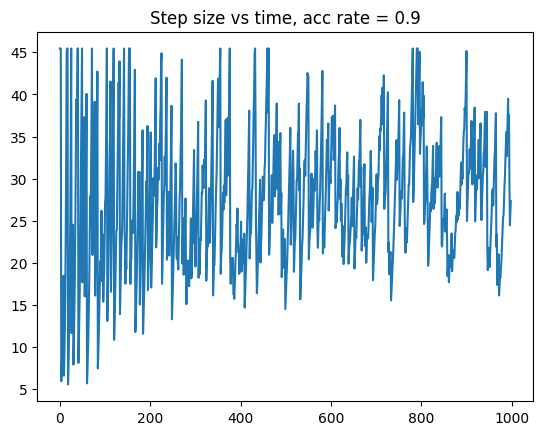

In [61]:
numbers_floats2 = [float(n) for n in numbers2.split("\n")[1:-1]]
import matplotlib.pyplot as plt

plt.plot(numbers_floats2)
# plt.xlabel('Index')
# plt.ylabel('Value')
plt.title('Step size vs time, acc rate = 0.9')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the CSV file
df1 = pd.read_csv('../omelyan10.csv')

df2 = pd.read_csv("../omelyan.csv")

df = pd.concat([df1, df2])
# df = df2

# filter df for just omelyan
# df = df[df['integrator'] == 'omelyan']
# df['sampler']

# Plot the ess_avg against dimension on a log scale
# plt.plot(df['dims'], df['ESS'])
# plt.xscale('log')


x = np.linspace(10, 1000000, 100)
y = x**(-1/8)
y2 = x**(-1/4)
sns.lineplot(x=x,y=y)
sns.lineplot(x=x,y=y2)


plot = sns.lineplot(data=df, x="dims", y="ESS AVG", hue="sampler", style="integrator")
plot.set(xscale='log')
plot.set(yscale='log')
plt.xlabel('Dimension')
plt.ylabel('ESS Average')
plt.title('ESS Average vs Dimension')
plt.show()

df
